# Ejemplo de juguete para mostrar el algoritmo de FVM
- Óscar A. Alvarado Morán
- Oscar A. Esquivel Flores

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Difusión 2-dimensional en un dominio rectangular
https://www.researchgate.net/profile/Abderrahim_Wakif/post/Urgent_How_can_I_discretize_a_non_linear_term/attachment/59d64dda79197b80779a7521/AS:490089747881984@1493857909565/download/%28Fluid+Mechanics+and+Its+Applications+113%29+F.+Moukalled%2C+L.+Mangani%2C+M.+Darwish+%28auth.%29-The+Finite+Volume+Method+in+Computational+Fluid+Dynamics_+An+Advanced+Introduction+with+OpenFOAM%C2%AE+and+.pdf

### Mallado 
Se usará un mallado rectangular tal como se muestra a continuación: 

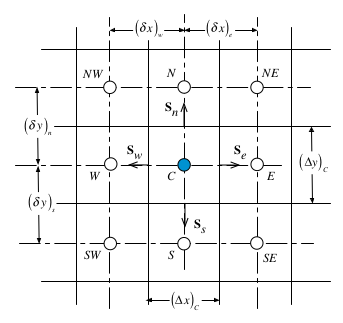

### Discretización

Lo que queremos hacer es discretizar sobre este dominio la ecuación de difusión de estado estacionario dada por

$$
-\nabla \cdot (\Gamma^{\phi}\nabla\phi ) = Q^{\phi}
$$

donde $\phi$ representa una variable escalar (temperatura, energía, etc.), $Q^{\phi}$ la generación de $\phi$ por unidad de volumen dentro del dominio, y $\Gamma^{\phi}$ el coeficiente de difusión. Esta ecuación puede escribirse de manera más general en términos de un flujo difusivo $\mathbf{J}^{\phi ,D}$ (la *D* viene de *difusión*, si fuera una *C* sería por *convección*) como

$$
\nabla\cdot\mathbf{J}^{\phi ,D} = Q^{\phi}
$$

de donde se sigue que $\mathbf{J}^{\phi ,D}$ se define como 

$$
\mathbf{J}^{\phi ,D} = -\Gamma^{\phi}\nabla\phi 
$$

integrando la primera ecuación de esta celda y usando el teorema de la divergencia obtenemos una discretización como se muestra acontinuación: 

$$
\sum_{f\sim nb(C)}(-\Gamma^{\phi}\nabla\phi )_{f}\cdot \mathbf{S}_{f} = Q_{C}^{\phi}V_{C}
$$

entonces, la suma la podemos descomponer para cada una de las caras, pensando en el plano mostrado en la figura de la celda de arriba:

$$
(-\Gamma^{\phi}\nabla\phi )_{e}\cdot \mathbf{S}_{e}+(-\Gamma^{\phi}\nabla\phi )_{w}\cdot \mathbf{S}_{w}+
(-\Gamma^{\phi}\nabla\phi )_{n}\cdot \mathbf{S}_{n}+(-\Gamma^{\phi}\nabla\phi )_{s}\cdot \mathbf{S}_{s} = 
Q_{C}^{\phi}V_{C}
$$

Ahora, los vectores normales a la superficie del volumen de control (las caras) están dados por:

$$
\mathbf{S}_{e} = S_{e}\mathbf{\hat{i}}, \;\;\; \mathbf{S}_{w} = -S_{w}\mathbf{\hat{i}} 
$$
$$
\mathbf{S}_{n} = S_{n}\mathbf{\hat{j}}, \;\;\; \mathbf{S}_{w} = -S_{s}\mathbf{\hat{j}} 
$$

De modo que el flujo de difusión para la cara _este_ viene dado por

$$
\mathbf{J}_{e}^{\phi,D} = (-\Gamma^{\phi}\nabla\phi )_{e}\cdot \mathbf{S}_{e} = -\Gamma^{\phi}_{e}S_{e}\left( \frac{\partial\phi}{\partial x}\mathbf{\hat{i}} + \frac{\partial\phi}{\partial y}\mathbf{\hat{j}}\right)_{e}\cdot \mathbf{\hat{i}}
$$
$$
= -\Gamma_{e}^{\phi}(\Delta y)_{e}\left(\frac{\partial \phi}{\partial x}\right)_{e}
$$

ahora, así como se ve en la página 109 de la referencia que se encuentra al principio, de la ecuación (5.16) tenemos que 

### Linealización

$$
J_{e}^{\phi ,D} = FluxT_{e} = FluxC_{e}\phi_{C} + FluxF_{e}\phi_{F} + FluxV_{e}
$$

que básicamente representa el flujo sobre una cara (la _este_ en nuestro caso) dividido en una parte lineal que es funciónd e $\phi$ evaluada en los nodos que se extienden a ambos lados de la cara en cuestión ($\phi_{C}$ y $\phi_{F}$) y una parte no lineal, que incluye la porción restante que no puede expresarse en términos de $\phi_{C}$ y $\phi_{F}$. Entonces tenemos que $FluxT_{f}$ representa el flujo total que atravieza a la cara f y que se descompone en tres términos. **Aquí estamos linealizando**

Así, tomando la anterior ecuación que teníamos para $J_{e}^{\phi ,D}$ tenemos que el gradiente en la cara _e_ sobre la dirección $\mathbf{\hat{i}}$ se puede escribir como:

$$
\left( \frac{\partial \phi}{\partial x}\right) = \frac{\phi_{E} - \phi_{C}}{(\delta x)_{e}}
$$
y así, comparando con la otra ecuación para $J_{e}^{\phi ,D}$ tenemos 

$$
FluxC_{e}\phi_{C} + FluxF_{e}\phi_{F} + FluxV_{e} = -\Gamma_{e}^{\phi}(\delta y)_{e} \frac{\phi_{E}-\phi_{C}}{\delta x_{e}} = \Gamma_{e}^{\phi} \frac{(\delta y)_{e}}{\delta x_{e}}\phi_{C}-\phi_{E},
$$

y definimos a $gDiff_{e}$ (viene de _gradiente_ esta notación) de la siguiente manera

$$
gDiff_{e} = \frac{(\Delta y)_{e}}{\delta x_{e}} = \frac{||\mathbf{S}_{e}||}{||\mathbf{d}_{CE}||} = \frac{S_{e}}{d_{CE}}
$$

donde $\mathbf{d}_{CE}$ es el vector que une a los centroides de los elementos C y E, por lo que los coeficientes de linealización se vuelven

$$FluxC_{e} = \Gamma _{e}^{\phi}gDiff_{e}$$
$$FluxF_{e} = -\Gamma _{e}^{\phi}gDiff_{e}$$
$$FluxV_{e} = 0$$

Aplicando el mismo procedimiento para las demás caras tenemos resultados similares, llegando a que

$$FluxC_{w} = \Gamma_{w}^{\phi}gDiff_{w},\;\;\; FluxF_{w} = -\Gamma_{w}^{\phi}gDiff_{w},\;\;\;FluxC_{w} = 0$$
$$FluxC_{n} = \Gamma_{n}^{\phi}gDiff_{n},\;\;\; FluxF_{n} = -\Gamma_{n}^{\phi}gDiff_{n},\;\;\;FluxC_{n} = 0$$
$$FluxC_{s} = \Gamma_{s}^{\phi}gDiff_{s},\;\;\; FluxF_{s} = -\Gamma_{s}^{\phi}gDiff_{s},\;\;\;FluxC_{s} = 0$$

y así, sustituyendo en la quinta ecuación de la anterior celda tenemos la forma algebráica de la ecuación de difusión

$$
a_{C}\phi_{C} + a_{E}\phi_{E} + a_{W}\phi_{W} + a_{N}\phi_{N} +a_{S}\phi_{S} = b_{C}
$$

o de manera más compacta

$$
a_{C}\phi_{C} + \sum_{F\sim NB(C)}a_{F}\phi_{F} = b_{C}
$$

con 

$$
a_{F} = FluxF_{f} = -\Gamma_{f}^{\phi}gDiff_{f}
$$
$$
a_{C} = \sum_{f\sim nb(C)}FluxC_{f}
$$
$$
b_{C} = Q_{C}^{\phi}V_{C} - \sum_{f\sim nb(C)}FluxV_{f}
$$
donde el subíndice $F$ denota los vecinos del elemento C (E, W, N, S) y el subíndice $f$ denota las caras vecinas del elemento C $(e,w,n,s)$.

### Condiciones de frontera

Sabemos que la solución analítica de las ecuaciones diferenciales ordinarias o parciales se puede obtener hasta que se fijan unas constantes que conocemos como condiciones de frontera, por lo que si se usan diferentes condiciones entonces tendremos diferentes soluciones incluso cuando la ecuación resulta ser la misma. Las soluciones numéricas funcionan de la misma manera.

Para los problemas de conducción/difusión se tienen diferentes tipos de condiciones de frontera: de Dirichlet, de Neumann, mixtas y simétricas. Las condiciones de frontera se aplican a los elementos (volúmenes) de la frontera, los cuáles tienen al menos una cara en la frontera.

Si tenemos un elemento $C$ con el centroide $b$ de una de sus caras que se encuentra en la frontera, como se muestra a continuación

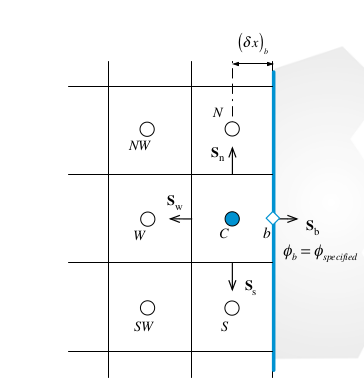

entonces, el proceso de discretización sobre dicho volumen se puede llevar de la misma manera como 

$$
\sum_{f\sim nb(C)}(\mathbf{J}^{\phi ,D}\cdot \mathbf{S})_{f} = Q_{C}^{\phi}V_{C}
$$

y también los flujos de las caras interiores son discretizadas como lo hicimos anteriormente, mientras que el flujo de la frontera se discretiza con el objetivo de construir una linealización con respecto a $\phi_{C}$, así 

$$
\mathbf{J}^{\phi ,D}_{b}\cdot \mathbf{S}_{b} = FluxT_{b} = -\Gamma_{b}^{\phi}(\nabla\phi )_{b}\cdot \mathbf{S}_{b}
$$
$$
= FluxC_{b}\phi_{C} + FluxV_{b}
$$
Especificar las condiciones de frontera implica especificar el valor de frontera $\phi_{b}$, o el flujo de frontera $\mathbf{J}^{\phi ,D}_{b}$.

### Conducción de calor

A continuación mostraremos un ejemplo de la conducción de calor utilizando la derivación mostrada arriba. La ecuación diferencial que resolveremos es la siguiente: 

$$
\nabla \cdot (k\nabla T) = 0
$$

donde $T$ representa la temperatura y $k$ la conductividad térmica. Las condiciones de frontera son las que se muestran a continuación: 

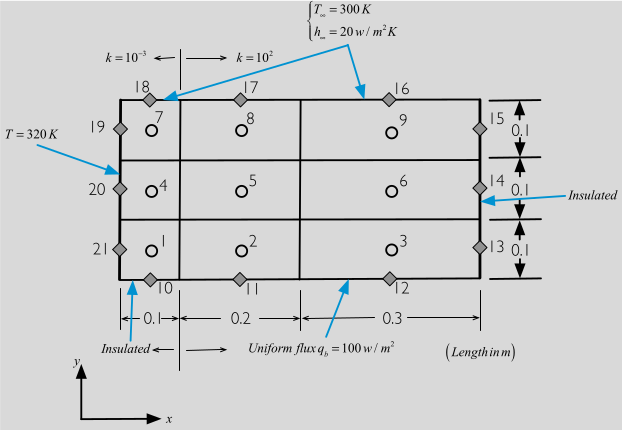

### Mallado

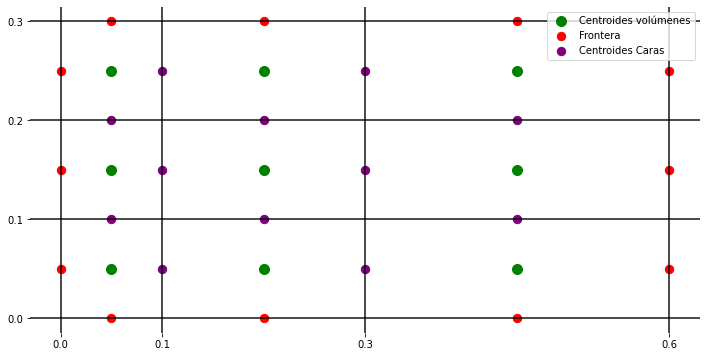

In [4]:
# Fijamos las coordenadas y qué caras le corresponden a cada celda volumétrica
C = {"1": {"coord": [0.05, 0.05], "F": ["22", "24"], "B": ["10", "21"], "V": 0.01}, 
     "2": {"coord": [0.20, 0.05], "F": ["22", "23", "25"], "B": ["11"], "V": 0.02},
     "3": {"coord": [0.45, 0.05], "F": ["23", "26"], "B": ["12", "13"], "V": 0.03}, 
     "4": {"coord": [0.05, 0.15], "F": ["24", "27", "29"], "B": ["20"], "V": 0.01}, 
     "5": {"coord": [0.20, 0.15], "F": ["25", "27", "28", "30"], "B": [], "V": 0.02},
     "6": {"coord": [0.45, 0.15], "F": ["26", "28", "31"], "B": ["14"], "V": 0.03}, 
     "7": {"coord": [0.05, 0.25], "F": ["29", "32"], "B": ["18", "19"], "V": 0.01}, 
     "8": {"coord": [0.20, 0.25], "F": ["30", "32", "33"], "B": ["17"], "V": 0.02}, 
     "9": {"coord": [0.45, 0.25], "F": ["31", "33"], "B": ["15", "16"], "V": 0.03}}
B = {"10": {"coord": [0.05, 0.00], "A": 0.1}, "11": {"coord": [0.20, 0.00], "A": 0.2}, 
     "12": {"coord": [0.45, 0.00], "A": 0.3}, "13": {"coord": [0.60, 0.05], "A": 0.1}, 
     "14": {"coord": [0.60, 0.15], "A": 0.1}, "15": {"coord": [0.60, 0.25], "A": 0.1}, 
     "16": {"coord": [0.45, 0.30], "A": 0.3}, "17": {"coord": [0.20, 0.30], "A": 0.2}, 
     "18": {"coord": [0.05, 0.30], "A": 0.1}, "19": {"coord": [0.00, 0.25], "A": 0.1}, 
     "20": {"coord": [0.00, 0.15], "A": 0.1}, "21": {"coord": [0.00, 0.05], "A": 0.1}}
F = {"22": {"coord": [0.10, 0.05], "A": 0.1}, "23": {"coord": [0.30, 0.05], "A": 0.1}, 
     "24": {"coord": [0.05, 0.10], "A": 0.1}, "25": {"coord": [0.20, 0.10], "A": 0.2}, 
     "26": {"coord": [0.45, 0.10], "A": 0.3}, "27": {"coord": [0.10, 0.15], "A": 0.1}, 
     "28": {"coord": [0.30, 0.15], "A": 0.1}, "29": {"coord": [0.05, 0.20], "A": 0.1}, 
     "30": {"coord": [0.20, 0.20], "A": 0.2}, "31": {"coord": [0.45, 0.20], "A": 0.3}, 
     "32": {"coord": [0.10, 0.25], "A": 0.1}, "33": {"coord": [0.30, 0.25], "A": 0.1}}
# Graficamos los centroides de los volúmenes, de las caras y de la frontera
fig, ax = plt.subplots(figsize = (12,6))
x_C = [C[i]["coord"][0] for i in C.keys()]
y_C = [C[i]["coord"][1] for i in C.keys()]
x_B = [B[i]["coord"][0] for i in B.keys()]
y_B = [B[i]["coord"][1] for i in B.keys()]
x_F = [F[i]["coord"][0] for i in F.keys()]
y_F = [F[i]["coord"][1] for i in F.keys()]
ax.grid(True, linewidth = 2, c = "k", alpha = 0.7)
ax.scatter(x_C, y_C, label = "Centroides volúmenes", c = "green", s = 100)
ax.scatter(x_B, y_B, c = "red", label = "Frontera", s = 70)
ax.scatter(x_F, y_F, c = "purple", label = "Centroides Caras", s = 70)
ax.set_xticks([0.0,0.1,0.3,0.6])
ax.set_yticks([0.0,0.1,0.2,0.3])
ax.legend(loc = 'upper right')
[ax.spines[key].set_visible(False) for key in list(ax.spines.keys())];

### Condiciones de frontera

In [5]:
for dic in [B, F]:
    for llave in dic.keys():
        if dic[llave]["coord"][0] < 0.1:
            dic[llave]["k"] = 10**(-3)
        elif dic[llave]["coord"][0] > 0.1:
            dic[llave]["k"] = 10**(2)
        else:
            dic[llave]["k"] = 3*10**(-3)

In [6]:
isolated = [10, 13, 14, 15]
t_320 = [19, 20, 21]
t_300 = [16, 17, 18]
for iso in isolated:
    B[str(iso)]["T"] = 0.0 
for temp in t_320:
    B[str(temp)]["T"] = 320.0
for temp in t_300:
    B[str(temp)]["T_inf"] = 300.0
    B[str(temp)]["h_inf"] = 20.0 # w/(m^2)K
for flux in [11, 12]:
    B[str(flux)]["Ufluxq_b"] = 100 # w/(m^2)

### Calculando ecuaciones algebráicas para cada celda volumétrica

In [7]:
def crear_ecuaciones(celda, dic_c = C, dic_b = B, dic_f = F):
    A = np.zeros(len(dic_c))
    b = 0
    for c_vecina in dic_c.keys(): # Todos los elementos de volumen
        for cara in dic_c[celda]['F']: # Las caras adyacentes a la celda que estamos analizando
            if c_vecina != celda and cara in dic_c[c_vecina]['F']: # Para encontrar los volúmenes adyacentes
                gDiff = (dic_f[cara]['A'])/np.linalg.norm(np.array(dic_c[c_vecina]["coord"]) - np.array(dic_c[celda]["coord"]))
                A[int(c_vecina) - 1] = -dic_f[cara]['k']*gDiff
                A[int(celda) - 1] += dic_f[cara]['k']*gDiff
    for frontera in dic_c[celda]['B']:
        if 'T' in dic_b[frontera].keys(): # Dirichlet
            if dic_b[frontera]['T'] != 0.0:
                gDiff = (dic_b[frontera]['A'])/np.linalg.norm(np.array(dic_b[frontera]["coord"]) - np.array(dic_c[celda]["coord"]))
                k = dic_b[frontera]['k']
                A[int(celda) - 1] += k*gDiff
                b += k*gDiff*dic_b[frontera]['T']
        elif "T_inf" in dic_b[frontera].keys(): # Dirichlet - Neumann
            num = dic_b[frontera]["h_inf"]*(dic_b[frontera]['k']/np.linalg.norm(np.array(dic_b[frontera]["coord"]) - np.array(dic_c[celda]["coord"])))
            den = dic_b[frontera]["h_inf"] + (dic_b[frontera]['k']/np.linalg.norm(np.array(dic_b[frontera]["coord"]) - np.array(dic_c[celda]["coord"])))
            R_eq = (num/den)*dic_b[frontera]['A']
            A[int(celda) - 1] += R_eq
            b += R_eq*dic_b[frontera]["T_inf"]
        elif "Ufluxq_b" in dic_b[frontera].keys(): # Neumann
            b += dic_b[frontera]["Ufluxq_b"]*dic_b[frontera]['A']
    return A, b

In [8]:
A = []
b = []
for volumen in C.keys():
    A_temp, b_temp = crear_ecuaciones(volumen)
    A.append(A_temp)
    b.append(b_temp)
np.array(A)

array([[ 5.00000000e-03, -2.00000000e-03,  0.00000000e+00,
        -1.00000000e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.00000000e-03,  2.40002000e+02, -4.00000000e+01,
         0.00000000e+00, -2.00000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.00000000e+01,  3.40000000e+02,
         0.00000000e+00,  0.00000000e+00, -3.00000000e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e-03,  0.00000000e+00,  0.00000000e+00,
         6.00000000e-03, -2.00000000e-03,  0.00000000e+00,
        -1.00000000e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.00000000e+02,  0.00000000e+00,
        -2.00000000e-03,  4.40002000e+02, -4.00000000e+01,
         0.00000000e+00, -2.00000000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.00000000e+02,
         0.00000000e+00, -4.00000000e+01,  6.400000

In [9]:
print(b)

[0.64, 20.0, 30.0, 0.64, 0, 0, 1.2394005994005997, 1188.118811881188, 1782.1782178217823]


### Mostrando el patrón que deja la matriz

In [26]:
arreglo = np.array(A) 
forma = arreglo.shape
patron = np.zeros(forma)
for i in range(forma[0]):
    for j in range(forma[1]):
        if arreglo[i,j] != 0:
            patron[i,j] = 1

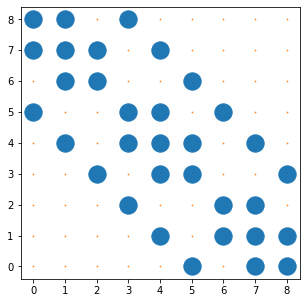

In [39]:
x = []
y = []
x_ceros = []
y_ceros = []
for i in range(patron.shape[0]):
    for j in range(patron.shape[1]):
        if patron[i,j] == 1:
            x.append(j)
            y.append(-i + patron.shape[1] - 1)
        else:
            x_ceros.append(j)
            y_ceros.append(-i + patron.shape[1] - 1)
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(x,y, s = 300)
ax.scatter(x_ceros, y_ceros, s = 0.5)
plt.show()

# Solución

In [31]:
# Por ahora obtendremos la solución con este solver de numpy, la idea sería probar distintos solvers
solucion = np.linalg.solve(A,b)
solucion

array([312.49035137, 305.25380149, 305.25361365, 311.94415388,
       305.1537667 , 305.15358861, 308.86703849, 305.05369961,
       305.05353982])

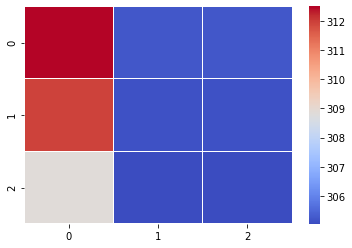

In [57]:
cuadricula = solucion.reshape((3,3))
sns.heatmap(cuadricula, cmap = "coolwarm", linewidths = 0.005)